# <center>ADVANCED DATA ANALYSIS</center>
# <center>HW1</center>
<center>Fan Yang</center>
<center>UNI: fy2232</center>
<center>01/31/2018</center>

# Problem 1

## (a)
**The reject region given is ${S\geq16}$, which contradicts with the two-sided alternative hypothesis. So I do in 2 ways as follow.**

### 1)
** Assume $H_a:\eta >0$**


Because any one observation is equally likely to be above or below the population median $\eta$, the number of $X_i \geq \eta = 0$ will have a binomial distribution with mean = 0.5.
\begin{split}
1-\alpha&=Pr(S\geq16|H_0)\\
&=\sum_{i=16}^{25}{{25}\choose{i}}\times (\frac{1}{2})^{25}\\
&=0.11476\\
\alpha&=0.88524
\end{split}
Therefore, the level of the test is 0.88524.

### 2)
** Assume reject region is $S\geq16$ and $S\leq9$**


Because any one observation is equally likely to be above or below the population median $\eta$, the number of $X_i \geq \eta = 0$ will have a binomial distribution with mean = 0.5.
\begin{split}
1-\alpha&=Pr(S\geq16\text{ and } S\leq9|H_0)\\
&=2\times\sum_{i=16}^{25}{{25}\choose{i}}\times (\frac{1}{2})^{25}\\
&=0.22952\\
\alpha&=0.770477
\end{split}
Therefore, the level of the test is 0.770477.

## (b)
\begin{split}
Pr(X_i>\eta_0)&=Pr(X_i>0)\\
&=1-Pr(\frac{X_i-0.5}{1}\leq-0.5)\\
&=1-Pr(Z\leq-0.5)\\
\text{where $Z$ follows $N(0,1)$.}\\
&=0.6915\\
\text{So $S$ follows $Bin(25,0.6915)$.}\\
\\
\text{power} &=Pr(\text{reject }H_0|H_1)\\
&=Pr(S\geq16|H_1)\\
&=\sum_{i=16}^{25}{{25}\choose{i}}\times (0.6915)^{i}\times(1-0.6915)^{25-i}\\
&=0.78355\\
\end{split}
Therefore, the power of the test is 0.78355.

- - -

# Problem 2

## (a)

In [16]:
pretest = c(30,28,31,26,20,30,34,15,28,20,
            30,29,31,29,34,20,26,25,31,29)
posttest = c(20,30,32,30,16,25,31,18,33,25,
            32,22,34,32,32,27,28,29,32,32)
diff = pretest-posttest
knitr::kable(cbind(pretest,posttest,diff)) 
print("mean of pretest-posttest is")
mean(diff)
print("standard deviation of pretest-posttest is")
sd(diff)



| pretest| posttest| diff|
|-------:|--------:|----:|
|      30|       20|   10|
|      28|       30|   -2|
|      31|       32|   -1|
|      26|       30|   -4|
|      20|       16|    4|
|      30|       25|    5|
|      34|       31|    3|
|      15|       18|   -3|
|      28|       33|   -5|
|      20|       25|   -5|
|      30|       32|   -2|
|      29|       22|    7|
|      31|       34|   -3|
|      29|       32|   -3|
|      34|       32|    2|
|      20|       27|   -7|
|      26|       28|   -2|
|      25|       29|   -4|
|      31|       32|   -1|
|      29|       32|   -3|

[1] "mean of pretest-posttest is"


[1] -0.7

[1] "standard deviation of pretest-posttest is"


[1] 4.437875

test statistis is defined as
\begin{split}
t^*&=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}\\
&=\frac{-0.7-0}{4.4379/\sqrt{20}}\\
&=-0.7054\\
\text{while } t_{n-1}(\alpha/2)=2.093>|t^*|=0.7054\\
\text{p-value}&=Pr(t>|t^*|)\\
&=0.48912\\
\end{split}
Therefore, we fail to reject $H_0$.

In [32]:
t.test(diff, mu=0)


	One Sample t-test

data:  diff
t = -0.7054, df = 19, p-value = 0.4891
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.77699  1.37699
sample estimates:
mean of x 
     -0.7 


We need to assume that pretest-posttest follows normal distribution.

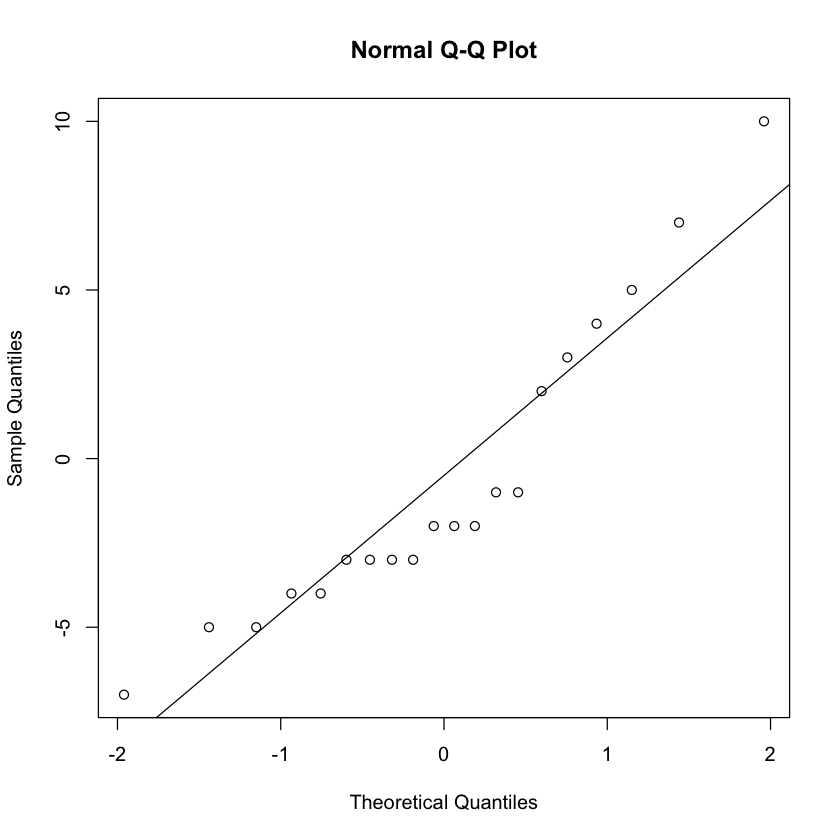

In [40]:
qqnorm(diff)
qqline(diff)

We can conclude that the difference is approximately follows normal distribution.

## (b)

The $100(1-\alpha)\%$ confidence interval is 
$$\bar{X}\pm t_{n-1}(\alpha/2)s/\sqrt{n}$$
which is $$-0.7\pm 2.093\times4.4379 / \sqrt{20}$$
$$[-2.77699, 1.37698]$$

In [44]:
-0.7+ 2.093*4.4379 / sqrt(20)
-0.7- 2.093*4.4379 / sqrt(20)

[1] 1.376977

[1] -2.776977

## (c)

In [46]:
signdiff = diff / abs(diff)
sum(signdiff>0)

[1] 6

The test statistic $T^* = \sum I(X_i>0)=6$<br>
and $T\sim Bin(n,0.5)$<br>
$|T-n/2|=|6-10|=4$<br>
\begin{split}
1-\alpha&=Pr(T>T')\\
&=\sum_{i=T'}^{20}{{20}\choose{i}}0.5^{20}\\
\end{split}
when $T'=7,~Pr(T>7)=0.94234$ and when $T'=6,~Pr(T>6)=0.979305$<br>
when $T'=13,~Pr(T<13)=0.94234$ and when $T'=14,~Pr(T<14)=0.979305$<br>
Let's calculate the p-value<br>
p-value$=2 min(P(T \leq 6), P(T \geq 6))=0.115318$, which is less than $\alpha$<br>
Therefore, we fail to reject $H_0$.

## (d)

In [65]:
library(BSDA)
SIGN.test(diff, md=0,,alternative="two.sided",conf.level=0.95)


	One-sample Sign-Test

data:  diff
s = 6, p-value = 0.1153
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
 -3.000000  1.650588
sample estimates:
median of x 
         -2 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt  U.E.pt
Lower Achieved CI     0.8847     -3 -1.0000
Interpolated CI       0.9500     -3  1.6506
Upper Achieved CI     0.9586     -3  2.0000


So the 95% confidence interval for $\eta$ is $[-3.000000,1.650588]$

- - -

# Problem 3

In [112]:
Active = c(9.00,9.50,9.75,10.00,13.00,9.50)
Noexe = c(11.50,12.00,9.00,11.50,13.25,13.00)
diffexe = Noexe - Active
knitr::kable(cbind(Active,Noexe,diffexe)) 
print("mean of Noexe - Active is")
mean(diffexe)
print("standard deviation of Noexe - Active is")
sd(diffexe)



| Active| Noexe| diffexe|
|------:|-----:|-------:|
|   9.00| 11.50|    2.50|
|   9.50| 12.00|    2.50|
|   9.75|  9.00|   -0.75|
|  10.00| 11.50|    1.50|
|  13.00| 13.25|    0.25|
|   9.50| 13.00|    3.50|

[1] "mean of Noexe - Active is"


[1] 1.583333

[1] "standard deviation of Noexe - Active is"


[1] 1.586401

## one sample t-test

Denote $\mu$ as the mean of the difference between the two groups.<br>
$H_0:~\mu=0;~~~~~H_1:~\mu \not= 0$

test statistis is defined as
\begin{split}
t^*&=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}\\
&=\frac{1.5833-0}{1.5864/\sqrt{6}}\\
&=2.44475\\
\text{while } t_{n-1}(\alpha/2)=2.57058>|t^*|=2.44475\\
\text{p-value}&=Pr(t>|t^*|)\\
&=0.0583115\\
\end{split}
Therefore, we fail to reject $H_0$.

In order to use this test we need to assume that X follows normal distribution. Now we use qqplot to check.

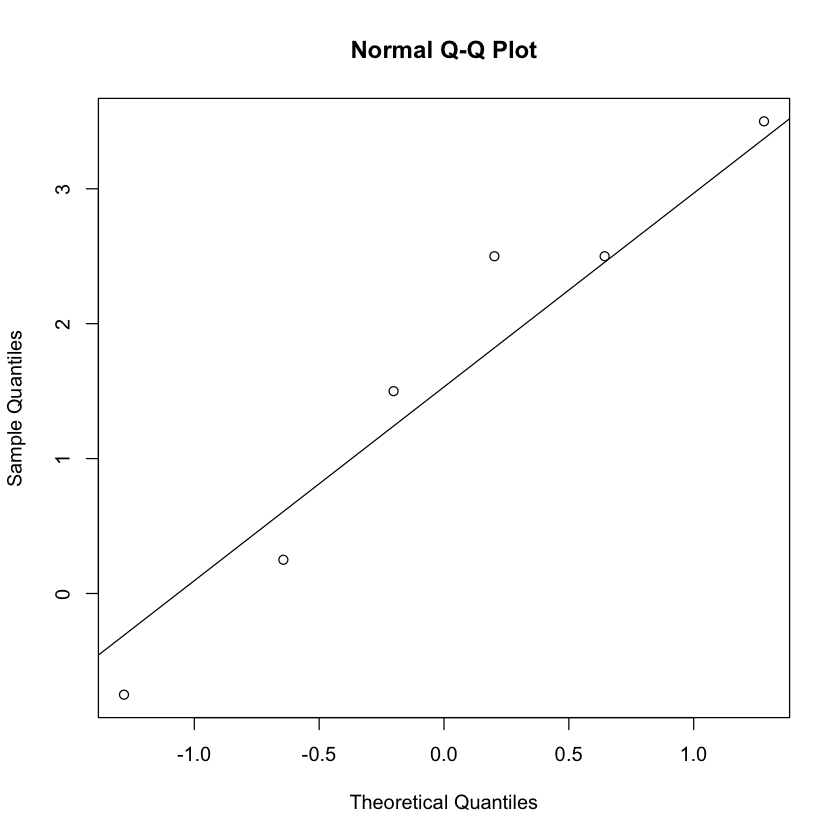

In [92]:
qqnorm(diffexe)
qqline(diffexe)

According to the above qqplot, we can assume the difference follows normal distribution.

In [93]:
t.test(diffexe, mu=0)


	One Sample t-test

data:  diffexe
t = 2.4448, df = 5, p-value = 0.05831
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.08149193  3.24815860
sample estimates:
mean of x 
 1.583333 


## Sign test

In [94]:
signdiffexe = diffexe / abs(diffexe)
sum(signdiffexe>0)

[1] 5

The test statistic $T^* = \sum I(X_i>0)=5$<br>
and $T\sim Bin(n,0.5)$<br>
$|T-n/2|=|4-3|=1$<br>
\begin{split}
1-\alpha&=Pr(T>T')\\
&=\sum_{i=T'}^{6}{{6}\choose{i}}0.5^{6}\\
\end{split}
when $T'=2,~Pr(T>2)=0.890625$ and when $T'=1,~Pr(T>1)=0.984375$<br>
when $T'=4,~Pr(T<4)=0.890625$ and when $T'=5,~Pr(T<5)=0.984375$<br>
Let's calculate the p-value<br>
p-value$=2 min(P(T \leq 5), P(T \geq 5))=0.21875$, which is greater than $\alpha$<br>
Therefore, we fail to reject $H_0$.

In [106]:
SIGN.test(diffexe, md=0,,alternative="two.sided",conf.level=0.95)


	One-sample Sign-Test

data:  diffexe
s = 5, p-value = 0.2187
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
 -0.65  3.40
sample estimates:
median of x 
          2 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt U.E.pt
Lower Achieved CI     0.7812   0.25    2.5
Interpolated CI       0.9500  -0.65    3.4
Upper Achieved CI     0.9688  -0.75    3.5


The Sign test do not need to assume normal sample, we only need the sample to be indenpendent.

***

# appendix

In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

In [111]:
# 1.a
p=0
for (i in 16:25){
    p=p+choose(25,i)*0.5^25
}
1-2*p

[1] 0.7704771

In [107]:
# 1.b
p=0
for (i in 16:25){
    p=p+choose(25,i)*pnorm(0.5)^(i)*(1-pnorm(0.5))^(25-i)
}
p
pnorm(0.5)
p*pnorm(0.5)^25
1-p*0.5^25
1-choose(25,16)*0.5^25
1-0.0609
pnorm(-0.5)
pnorm(0.5)

[1] 0.7835511

[1] 0.6914625

[1] 7.731834e-05

[1] 1

[1] 0.9391146

[1] 0.9391

In [113]:
# 2.c
p=0
for (i in 0:14){
    p=p+choose(20,i)*0.5^20
}
p
2*p

[1] 0.9793053

[1] 1.958611

In [105]:
# 3.t-test
mean(diffexe)/sd(diffexe)*sqrt(6)
qt(0.975,5)
(1-pt(mean(diffexe)/sd(diffexe)*sqrt(6),5))*2

[1] 2.444754

[1] 2.570582

[1] 0.05831152

In [103]:
# 3.signtest
p=0
for (i in 5:6){
    p=p+choose(6,i)*0.5^6
}
2*p

[1] 0.21875